# Structure Align Package Demo

This notebook demonstrates how to use the `structure-align` package for aligning protein structures with different lengths.

## Features Demonstrated:
- ✅ Pairwise sequence alignment followed by structural alignment
- ✅ Residue ID mapping and querying
- ✅ Rich DataFrame analysis with chain information
- ✅ Static plotting (matplotlib)
- ✅ Interactive plotting (Plotly) with hover information
- ✅ Chain-aware visualization


## 1. Setup and Imports


In [1]:
import MDAnalysis as mda
from structurealign import StructuralAligner

## 2. Load Protein Structures

Load two protein structures that may have different lengths.


In [2]:
# Load your protein structures
# Replace these with your actual PDB files
try:
    reference = mda.Universe("tkMAT_D-SAM_cleaned.pdb")  # Reference structure
    mobile = mda.Universe("tkMAT-D.pdb")  # Mobile structure

    print(f"📁 Reference structure loaded: {len(reference.atoms)} atoms")
    print(f"📁 Mobile structure loaded: {len(mobile.atoms)} atoms")
    print(f"🧬 Reference chains: {len(reference.segments)} segments")
    print(f"🧬 Mobile chains: {len(mobile.segments)} segments")

except FileNotFoundError as e:
    print(f"❌ File not found: {e}")
    print("💡 Please place your PDB files in the current directory")
    print("💡 Or modify the file paths in the cell above")


📁 Reference structure loaded: 12602 atoms
📁 Mobile structure loaded: 6334 atoms
🧬 Reference chains: 3 segments
🧬 Mobile chains: 4 segments


## 3. Initialize Aligner and Perform Alignment

Create the structural aligner and perform the alignment using CA atoms.


In [3]:
# Initialize the structural aligner with verbose output
aligner = StructuralAligner(verbose=True)

print("🔄 Performing structural alignment...")
print("=" * 50)

# Perform alignment using CA atoms (default)
result = aligner.align(reference, mobile, selection="name CA")

print("=" * 50)
print("✅ Alignment completed!")


🔄 Performing structural alignment...
Sequence alignment score: 783.5
Matched reference residue IDs: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

## 4. Alignment Results Summary


In [4]:
print("📊 ALIGNMENT RESULTS")
print("=" * 40)
print(f"RMSD before alignment: {result.rmsd_before:.2f} Å")
print(f"RMSD after alignment:  {result.rmsd_after:.2f} Å")
print(f"Number of aligned residues: {result.n_aligned_residues}")
print(f"Sequence alignment score: {result.sequence_alignment.alignment_score:.1f}")

# Calculate improvement
improvement = result.rmsd_before - result.rmsd_after
improvement_pct = (improvement / result.rmsd_before) * 100
print(f"\n📈 RMSD improvement: {improvement:.2f} Å ({improvement_pct:.1f}%)")


📊 ALIGNMENT RESULTS
RMSD before alignment: 38.42 Å
RMSD after alignment:  2.38 Å
Number of aligned residues: 805
Sequence alignment score: 783.5

📈 RMSD improvement: 36.04 Å (93.8%)


## 5. Sequence Alignment Details


In [5]:
print("🧬 SEQUENCE ALIGNMENT")
print("=" * 40)
print(f"Reference: {result.sequence_alignment.reference_sequence}")
print(f"Mobile:    {result.sequence_alignment.mobile_sequence}")

# Show gaps in alignment
ref_gaps = result.sequence_alignment.reference_sequence.count("-")
mob_gaps = result.sequence_alignment.mobile_sequence.count("-")
print("\n📊 Alignment gaps:")
print(f"   Reference gaps: {ref_gaps}")
print(f"   Mobile gaps: {mob_gaps}")
print(f"   Total alignment length: {len(result.sequence_alignment.reference_sequence)}")


🧬 SEQUENCE ALIGNMENT
Reference: ---KVRNIVVEELVRTPVEMQKVELVERKGIGHPDSIADGIAEAVSRALSREYVKRYGIILHHNTDQVEVVGGRAYPQFGGGEVIKPIYILLSGRAVEMVDREFFPVHEIALKAAKDYLRKAVRHLDLEHHVIIDSRIGQGSVDLVGVFNKAKKNPIPLANDTSFGVGYAPLSETEKIVLETEKYLNSDEFKKKYPAVGEDIKVMGLRKGDEIDLTIAAAIVDSEVDNPDDYMAVKEAIYEAAKGIVESHTERPTNIYVNTADDPKEGIYYITVTGTSAEAGDDGSVGRGNRVNGLITPNRHMSMEAAAGKNPVSHVGKIYNILSMLIANDIAEQVEGVEEVYVRILSQIGKPIDEPLVASVQIIPKKGYSIDVLQKPAYEIADEWLANITKIQKMILEDKVNVF--GKVRNIVVEELVRTPVEMQKVELVERKGIGHPDSIADGIAEAVSRALSREYVKRYGIILHHNTDQVEVVGGRAYPQFGGGEVIKPIYILLSGRAVEMVDREFFPVHEIALKAAKDYLRKAVRHLDLEHHVIIDSRIGQGSVDLVGVFNKAKKNPIPLANDTSFGVGYAPLSETEKIVLETEKYLNSDEFKKKYPAVGEDIKVMGLRKGDEIDLTIAAAIVDSEVDNPDDYMAVKEAIYEAAKGIVESHTERPTNIYVNTADDPKEGIYYITVTGTSAEAGDDGSVGRGNRVNGLITPNRHMSMEAAAGKNPVSHVGKIYNILSMLIANDIAEQVEGVEEVYVRILSQIGKPIDEPLVASVQIIPKKGYSIDVLQKPAYEIADEWLANITKIQKMILEDKVNVF
Mobile:    MAGKVRNIVVEELVRTPVEMQKVELVERKGIGHPDSIADGIAEAVSRALSREYVKRYGIILHHNTDQVEVVGGRAYPQFGGGEVIKPIYILLSGRAVEMVDREFFPVHEIALKAAKDYLRKAVRHLDLEHHVIIDSRIGQGSVDLV

## 6. Residue Pair Examples

Show the complete DataFrame with all residue information including chain data.


In [ ]:
# Get the complete DataFrame
df = result.get_residue_info_table()
df


,ref_resid,mob_resid,distance,ref_aa,mob_aa,ref_chain,mob_chain
0,24,4,4.154623,-,M,A,A
1,25,5,3.460126,-,A,A,A
2,26,6,3.030670,-,G,A,A
3,27,7,3.114703,K,K,A,A
4,28,8,2.979818,V,V,A,A
...,...,...,...,...,...,...,...
800,421,401,0.518905,M,M,B,B
801,422,402,0.570944,I,I,B,B
802,423,403,0.542552,L,L,B,B
803,424,404,0.281555,E,E,B,B


## 9. Static Plotting (Matplotlib)

Create publication-ready static plots using matplotlib.


/var/folders/qj/km84d2qd1c7dcj181088k7lh0000gn/T/ipykernel_10159/1766991412.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_static.show()


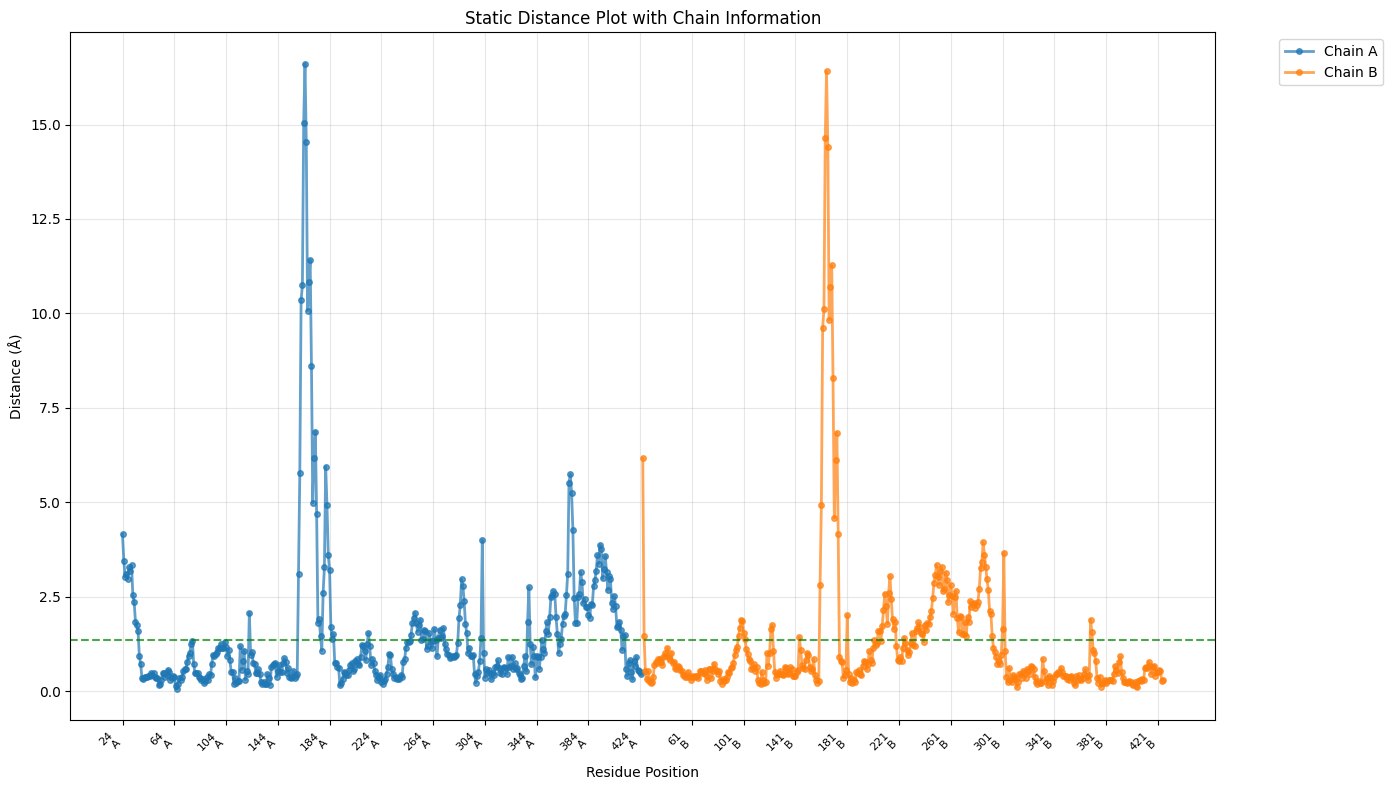

In [7]:
# Create static plot with chain information
fig_static = aligner.plot_distances(
    result, title="Static Distance Plot with Chain Information", figsize=(14, 8)
)
fig_static.show()

## 10. Interactive Plotting (Plotly)

Create interactive plots with rich hover information.


In [8]:
print("🎯 Creating interactive Plotly plot...")

# Create interactive plot with rich hover information
fig_interactive = aligner.plot_distances_interactive(
    result,
    title="Interactive Distance Plot with Rich Hover Info",
    height=700,
    width=1200,
)

# Display the interactive plot
fig_interactive


🎯 Creating interactive Plotly plot...


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': '%{hovertext}<extra></extra>',
              'hovertext': [<b>Residue Information</b><br>Reference: -24 (Chain
                            A)<br>Mobile: M4 (Chain A)<br>Distance: 4.15
                            Å<br>Alignment Position: 0, <b>Residue
                            Information</b><br>Reference: -25 (Chain A)<br>Mobile:
                            A5 (Chain A)<br>Distance: 3.46 Å<br>Alignment Position:
                            1, <b>Residue Information</b><br>Reference: -26 (Chain
                            A)<br>Mobile: G6 (Chain A)<br>Distance: 3.03
                            Å<br>Alignment Position: 2, ..., <b>Residue
                            Information</b><br>Reference: D423 (Chain A)<br>Mobile:
                            D403 (Chain A)<br>Distance: 0.52 Å<br>Alignment
                            Position: 399, <b>Residue Information</b><br>Reference:
                            K424 (Chain A)<br>Mobile: K404 (Chain A)<br>Distance:
                            0.52 Å<br>Alignment Position: 400, <b>Residue
                            Information</b><br>Reference: V425 (Chain A)<br>Mobile:
                            V405 (Chain A)<br>Distance: 0.45 Å<br>Alignment
                            Position: 401],
              'line': {'color': 'rgb(228,26,28)', 'width': 2},
              'marker': {'color': 'rgb(228,26,28)', 'size': 6},
              'mode': 'lines+markers',
              'name': 'Chain A',
              'showlegend': True,
              'type': 'scatter',
              'x': array([  0,   1,   2, ..., 399, 400, 401]),
              'y': array([4.15462303, 3.46012592, 3.03066969, ..., 0.52488106, 0.52177292,
                          0.45132595])},
             {'hovertemplate': '%{hovertext}<extra></extra>',
              'hovertext': [<b>Residue Information</b><br>Reference: N23 (Chain
                            B)<br>Mobile: N3 (Chain B)<br>Distance: 6.16
                            Å<br>Alignment Position: 0, <b>Residue
                            Information</b><br>Reference: V24 (Chain B)<br>Mobile:
                            V4 (Chain B)<br>Distance: 1.45 Å<br>Alignment Position:
                            1, <b>Residue Information</b><br>Reference: F25 (Chain
                            B)<br>Mobile: F5 (Chain B)<br>Distance: 0.55
                            Å<br>Alignment Position: 2, ..., <b>Residue
                            Information</b><br>Reference: L423 (Chain B)<br>Mobile:
                            L403 (Chain B)<br>Distance: 0.54 Å<br>Alignment
                            Position: 400, <b>Residue Information</b><br>Reference:
                            E424 (Chain B)<br>Mobile: E404 (Chain B)<br>Distance:
                            0.28 Å<br>Alignment Position: 401, <b>Residue
                            Information</b><br>Reference: D425 (Chain B)<br>Mobile:
                            D405 (Chain B)<br>Distance: 0.31 Å<br>Alignment
                            Position: 402],
              'line': {'color': 'rgb(55,126,184)', 'width': 2},
              'marker': {'color': 'rgb(55,126,184)', 'size': 6},
              'mode': 'lines+markers',
              'name': 'Chain B',
              'showlegend': True,
              'type': 'scatter',
              'x': array([  0,   1,   2, ..., 400, 401, 402]),
              'y': array([6.16169262, 1.45272875, 0.5453276 , ..., 0.54255241, 0.28155458,
                          0.30745825])}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'Chain boundary',
                                'x': 401.5,
                                'xanchor': 'left',
                                'xref': 'x',
                                'y': 1,
                                'yanchor': 'top',
                                'yref': 'y domain'},
                               {'showarrow': False,
                                'text': 'Mean: 1.37 Å',
   

## 11. Export Results


In [9]:
print("💾 Exporting results...")

# Save DataFrame to CSV
df.to_csv("alignment_results.csv", index=False)
print("✅ DataFrame saved as 'alignment_results.csv'")

# Save static plot
fig_static.savefig("static_alignment_plot.png", dpi=300, bbox_inches="tight")
print("✅ Static plot saved as 'static_alignment_plot.png'")

# Save interactive plot as HTML
fig_interactive.write_html("interactive_alignment_plot.html")
print("✅ Interactive plot saved as 'interactive_alignment_plot.html'")

print("\n🎉 All results exported successfully!")
print("📁 Check the current directory for output files")


💾 Exporting results...
✅ DataFrame saved as 'alignment_results.csv'
✅ Static plot saved as 'static_alignment_plot.png'
✅ Interactive plot saved as 'interactive_alignment_plot.html'

🎉 All results exported successfully!
📁 Check the current directory for output files
